In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analises Pós Modelos

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CAEC'}>],
       [<Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'SCC'}>,
        <Axes: title={'center': 'CALC'}>],
       [<Axes: title={'center': 'NObeyesdad'}>, <Axes: >, <Axes: >]],
      dtype=object)

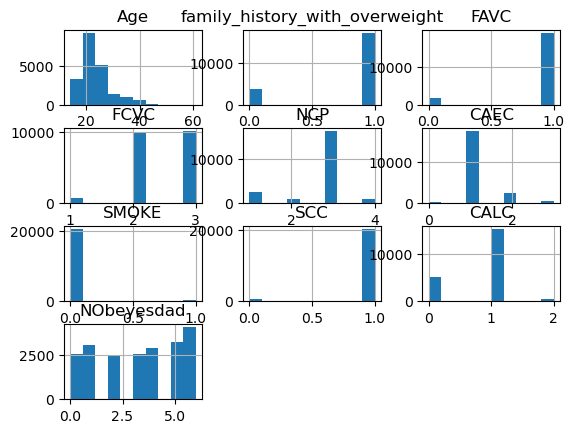

In [2]:
df = pd.read_pickle('df_after_models.pkl')
df.hist()

In [3]:
df.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,...,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,AUTOMOBILE,PUBLIC_TRANS,WALKING,IMC
0,0.0,1.0,0,24,1.699998,81.66995,1,1,2,3,...,2.763573,1,0.0,0.976473,1,3,0.0,1.0,0.0,28.259565
1,1.0,0.0,1,18,1.56,57.0,1,1,2,3,...,2.0,1,1.0,1.0,0,1,1.0,0.0,0.0,23.422091
2,1.0,0.0,2,18,1.71146,50.165754,1,1,2,1,...,1.910378,1,0.866045,1.673584,0,0,0.0,1.0,0.0,17.126706
3,1.0,0.0,3,21,1.71073,131.274851,1,1,3,3,...,1.674061,1,1.467863,0.780199,1,6,0.0,1.0,0.0,44.855798
4,0.0,1.0,4,32,1.914186,93.798055,1,1,3,2,...,1.979848,1,1.967973,0.931721,1,3,0.0,1.0,0.0,25.599151
